*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/6_definite_modifier.ipynb)*

# Time Adverbial Distribution and Collocations
## Difference in Prepositions between Time and Loca
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Mon 30 Nov 2020 11:52:26 GMT


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df

# load POS PCA placements
pca_comps = pd.read_csv('head_pos_PCA.csv')
pca_comps.set_index(['head_lexn', 'head', 'head_voc', 'head_pos'], inplace=True)

<hr>

In [3]:
hm_df.head()

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_marks,has_nom
node,,,,,,,,,,,,,,,,,,,,,
651542,Time,Gen 1:1,Genesis,prep_ph,ראשׁית,בְּרֵאשִׁ֖ית,ב.ראשׁית,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.prep.bare.øanchor,...,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose,0,False
651544,Subj,Gen 1:1,Genesis,cont,אלהים,אֱלֹהִ֑ים,אלהים,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.øanchor,...,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose,1,True
651547,Subj,Gen 1:2,Genesis,defi_ph,ארץ,הָאָ֗רֶץ,ה.ארץ,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,single.definite,...,NaN,VC,True,qtl,היה,Gen,Hebrew,prose,1,True
651551,Subj,Gen 1:2,Genesis,cont,חשׁך,חֹ֖שֶׁךְ,חשׁך,וְחֹ֖שֶׁךְ עַל־פְּנֵ֣י תְהֹ֑ום,וְחֹ֖שֶׁךְ עַל־פְּנֵ֣י תְהֹ֑ום,single.bare.øanchor,...,NaN,NC,False,NaN,NaN,Gen,Hebrew,prose,0,False
651554,Subj,Gen 1:2,Genesis,geni_ph,רוח,ר֣וּחַ אֱלֹהִ֔ים,רוח.אלהים,וְר֣וּחַ אֱלֹהִ֔ים מְרַחֶ֖פֶת עַל־פְּנֵ֥י הַמּ...,וְר֣וּחַ אֱלֹהִ֔ים מְרַחֶ֖פֶת עַל־פְּנֵ֥י הַמּ...,single.genitive,...,NaN,VC,True,ptcp,רחף,Gen,Hebrew,prose,1,True


In [4]:
hm_df.function.value_counts()

Subj    26540
Cmpl    17444
Objc    16684
Adju     6824
Time     3493
Loca     2135
Name: function, dtype: int64

In [5]:
hm_df.columns

Index(['function', 'ref', 'book', 'ph_type', 'head', 'text', 'token', 'clause',
       'sentence', 'classi', 'head_node', 'head_lexn', 'head_voc',
       'head_etcbc', 'head_pos', 'head_type', 'plural', 'suffix',
       'preposition', 'leading_prep', 'trailing_prep', 'tokenized_prep',
       'extended_prep', 'ø', 'øanchor', 'genitive', 'definite', 'quantified',
       'quant_str', 'cardinal', 'qualitative', 'qual_str', 'demonstrative',
       'demon_str', 'demon_dist', 'ordinal', 'ord_str', 'cl_kind', 'verb',
       'tense', 'verb_lex', 'book_sbl', 'lang', 'genre', 'nom_marks',
       'has_nom'],
      dtype='object')

In [6]:
hm_df.tokenized_prep.value_counts()

ב            8643
את           5351
ל            4838
מן           3333
אל           2495
             ... 
עד.ל.פנה        1
כ.בלי           1
נכח.פנה         1
מן.על.תוך       1
ל.בד.על         1
Name: tokenized_prep, Length: 124, dtype: int64

### Compare prepositions

In [7]:
prep_ct = pd.pivot_table(
    hm_df,
    index='function',
    columns='tokenized_prep',
    aggfunc='size',
    fill_value=0,
)

# sort on prep sums
prep_ct = prep_ct[prep_ct.sum().sort_values(ascending=False).index]

prep_pr = prep_ct.div(prep_ct.sum(1), 0)

prep_ct.iloc[:, :20]

tokenized_prep,ב,את,ל,מן,אל,על,כ,עד,ל.פנה,עם,אחר,תחת,מן.פנה,ב.תוך,מן.על,מן.את,בין,פנה,על.פנה,על.ראשׁ
function,,,,,,,,,,,,,,,,,,,,
Adju,2257,49,1063,767,62,478,970,72,124,103,13,80,70,32,7,29,10,0,6,2
Cmpl,4266,110,3487,2323,2404,1684,92,111,274,183,122,39,70,64,125,48,37,4,37,39
Loca,1078,1,31,99,28,163,0,14,45,1,3,46,0,38,0,0,6,0,11,5
Objc,1,5160,0,9,0,0,7,3,0,0,0,0,0,0,0,0,0,32,0,0
Subj,0,30,3,17,0,0,17,1,0,0,0,0,0,0,0,0,0,19,0,0
Time,1041,1,254,118,1,1,46,313,9,0,93,0,0,2,0,0,11,0,0,0


In [8]:
prep_pr

tokenized_prep,ב,את,ל,מן,אל,על,כ,עד,ל.פנה,עם,...,מן.על.תוך,קבל,יען,מן.עם.פנה,נגד.פנה,בלת,נכח.פנה,מן.אצל,עד.בלי,על.עבר
function,,,,,,,,,,,,,,,,,,,,,
Adju,0.349597,0.007590,0.164653,0.118804,0.009603,0.074040,0.150248,0.011152,0.019207,0.015954,...,0.000000,0.000155,0.000155,0.000000,0.000155,0.000000,0.000000,0.000000,0.000155,0.000000
Cmpl,0.268521,0.006924,0.219488,0.146220,0.151319,0.105999,0.005791,0.006987,0.017247,0.011519,...,0.000063,0.000000,0.000000,0.000063,0.000000,0.000000,0.000063,0.000063,0.000000,0.000063
Loca,0.655319,0.000608,0.018845,0.060182,0.017021,0.099088,0.000000,0.008511,0.027356,0.000608,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Objc,0.000191,0.985862,0.000000,0.001720,0.000000,0.000000,0.001337,0.000573,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Subj,0.000000,0.319149,0.031915,0.180851,0.000000,0.000000,0.180851,0.010638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Time,0.526555,0.000506,0.128477,0.059686,0.000506,0.000506,0.023268,0.158321,0.004552,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000506,0.000000,0.000000,0.000000,0.000000


In [9]:
prep_dp = mystats.apply_deltaP(prep_pr, 0, 1)

prep_dp

tokenized_prep,ב,את,ל,מן,אל,על,כ,עד,ל.פנה,עם,...,מן.על.תוך,קבל,יען,מן.עם.פנה,נגד.פנה,בלת,נכח.פנה,מן.אצל,עד.בלי,על.עבר
function,,,,,,,,,,,,,,,,,,,,,
Adju,0.059480,-0.255020,0.084908,0.029072,-0.024166,0.032921,0.107998,-0.025854,0.009376,0.013529,...,-0.000013,0.000155,0.000155,-0.000013,0.000155,-0.000101,-0.000013,-0.000013,0.000155,-0.000013
Cmpl,-0.037811,-0.255819,0.150710,0.061971,0.145893,0.071272,-0.065350,-0.030852,0.007024,0.008206,...,0.000063,-0.000031,-0.000031,0.000063,-0.000031,-0.000101,0.000063,0.000063,-0.000031,0.000063
Loca,0.426346,-0.263398,-0.090062,-0.041274,-0.015264,0.062979,-0.072299,-0.029024,0.019154,-0.004887,...,-0.000013,-0.000031,-0.000031,-0.000013,-0.000031,-0.000101,-0.000013,-0.000013,-0.000031,-0.000013
Objc,-0.359808,0.918906,-0.112676,-0.111429,-0.035690,-0.055926,-0.070694,-0.038549,-0.013672,-0.005616,...,-0.000013,-0.000031,-0.000031,-0.000013,-0.000031,-0.000101,-0.000013,-0.000013,-0.000031,-0.000013
Subj,-0.360037,0.118851,-0.074378,0.103529,-0.035690,-0.055926,0.144722,-0.026470,-0.013672,-0.005616,...,-0.000013,-0.000031,-0.000031,-0.000013,-0.000031,-0.000101,-0.000013,-0.000013,-0.000031,-0.000013
Time,0.271830,-0.263521,0.041497,-0.041869,-0.035083,-0.055319,-0.044378,0.150748,-0.008210,-0.005616,...,-0.000013,-0.000031,-0.000031,-0.000013,-0.000031,0.000506,-0.000013,-0.000013,-0.000031,-0.000013


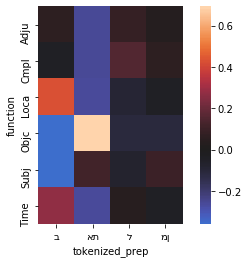

In [10]:
sns.heatmap(prep_dp.iloc[:, :4], robust=True, square=True, center=0)

Compare with PCA

In [11]:
advbs_pca = pca_comps[pca_comps['PC1'] < 0]
advbs_lexns = advbs_pca.index.get_level_values('head_lexn')
nouns_pca = pca_comps[pca_comps['PC1'] > 0]
nouns_lexns = nouns_pca.index.get_level_values('head_lexn')

In [12]:
nouns_pca

,,,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
head_lexn,head,head_voc,head_pos,,,,,,,,,
1437595,יום,יֹום,subs,0.486032,0.053467,-0.042813,0.015354,0.089755,0.102405,0.038150,0.014411,-1.500882e-17
1437627,שׁנה,שָׁנָה,subs,0.440417,-0.160218,-0.139755,0.441079,-0.049093,0.004349,-0.056177,0.001519,-5.229864e-17
1438005,עת,עֵת,subs,0.471130,0.113035,0.115861,-0.044042,0.111814,0.224024,0.013885,-0.051044,6.929722e-17
1437596,לילה,לַיְלָה,subs,0.239561,0.276356,-0.073929,-0.049194,0.012378,0.067128,0.095619,-0.008329,-4.638175e-17
1437970,חדשׁ,חֹדֶשׁ,subs,0.459120,-0.023951,-0.111211,0.155625,-0.000106,0.017050,-0.045542,0.190776,-8.870433e-17
1437598,בקר,בֹּקֶר,subs,0.458090,0.534849,-0.100141,-0.135707,-0.042378,-0.112777,0.005170,-0.001147,-4.137841e-17
1437597,ערב,עֶרֶב,subs,0.576803,0.548034,-0.100239,-0.036099,-0.079835,-0.100950,-0.005744,-0.003535,-4.070947e-17
1438146,דבר,דָּבָר,subs,0.493481,0.001341,-0.210899,-0.097486,0.161795,0.216665,-0.045805,-0.069913,8.647924e-17
1438513,מות,מָוֶת,subs,0.439242,-0.346050,0.561856,-0.057313,-0.087362,0.023503,0.002010,0.003063,1.142348e-16


### Within Time

In [13]:
tprep_ct = pd.pivot_table(
    hm_df[hm_df.function == 'Time'],
    index='head_etcbc',
    columns='tokenized_prep',
    aggfunc='size',
    fill_value=0,
)

# sort twice
tprep_ct = tprep_ct[tprep_ct.sum().sort_values(ascending=False).index]
tprep_ct = tprep_ct.loc[tprep_ct.sum(1).sort_values(ascending=False).index]

# proportions
tprep_pr = tprep_ct.div(tprep_ct.sum(1), 0)

tprep_ct.head()

tokenized_prep,ב,עד,ל,מן,אחר,כ,מן.קץ,ב.אחרית,ב.עצם,בין,...,כ.מן,ל.מן.ב,על,ל.ראשׁ,מן.ל,מן.קצת,עד.אחר,עד.בלת,עד.מן,ל.פנה.מן
head_etcbc,,,,,,,,,,,,,,,,,,,,,
JWM/,588,98,27,30,1,18,6,12,14,1,...,0,0,1,0,0,1,0,0,0,0
<WLM/,0,55,103,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
<T/,112,9,14,3,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BQR=/,79,23,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CNH/,60,7,3,1,0,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tprep_pr

tokenized_prep,ב,עד,ל,מן,אחר,כ,מן.קץ,ב.אחרית,ב.עצם,בין,...,כ.מן,ל.מן.ב,על,ל.ראשׁ,מן.ל,מן.קצת,עד.אחר,עד.בלת,עד.מן,ל.פנה.מן
head_etcbc,,,,,,,,,,,,,,,,,,,,,
JWM/,0.720588,0.120098,0.033088,0.036765,0.001225,0.022059,0.007353,0.014706,0.017157,0.001225,...,0.0,0.0,0.001225,0.0,0.0,0.001225,0.0,0.0,0.0,0.0
<WLM/,0.000000,0.325444,0.609467,0.053254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
<T/,0.732026,0.058824,0.091503,0.019608,0.000000,0.091503,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
BQR=/,0.686957,0.200000,0.078261,0.034783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
CNH/,0.689655,0.080460,0.034483,0.011494,0.000000,0.011494,0.103448,0.011494,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLWXJM/,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
CLJCJ/,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
CLCWM/,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Example of MXRT for article

In [15]:
tprep_ct.loc['MXRT/'].sort_values(ascending=False)

tokenized_prep
מן          23
ל            2
עד.מן        1
בין          0
עד.ל         0
ל.קץ         0
ל.מן         0
מן.קצה       0
ל.פנה        0
ל.פנה.מן     0
ב.עצם        0
מן.אחר       0
מן.קץ        0
כ            0
אחר          0
עד           0
ב.אחרית      0
עד.עצם       0
ב.תוך        0
את           0
אל           0
ב.ראשׁ       0
בלת          0
ראשׁ         0
כ.מן         0
ל.מן.ב       0
על           0
ל.ראשׁ       0
מן.ל         0
מן.קצת       0
עד.אחר       0
עד.בלת       0
ב            0
Name: MXRT/, dtype: int64

In [16]:
tprep_ct.loc['MXRT/'].sum()

26

In [17]:
tprep_pr.loc['MXRT/'].sort_values(ascending=False)

tokenized_prep
מן          0.884615
ל           0.076923
עד.מן       0.038462
בין         0.000000
עד.ל        0.000000
ל.קץ        0.000000
ל.מן        0.000000
מן.קצה      0.000000
ל.פנה       0.000000
ל.פנה.מן    0.000000
ב.עצם       0.000000
מן.אחר      0.000000
מן.קץ       0.000000
כ           0.000000
אחר         0.000000
עד          0.000000
ב.אחרית     0.000000
עד.עצם      0.000000
ב.תוך       0.000000
את          0.000000
אל          0.000000
ב.ראשׁ      0.000000
בלת         0.000000
ראשׁ        0.000000
כ.מן        0.000000
ל.מן.ב      0.000000
על          0.000000
ל.ראשׁ      0.000000
מן.ל        0.000000
מן.קצת      0.000000
עד.אחר      0.000000
עד.בלת      0.000000
ב           0.000000
Name: MXRT/, dtype: float64

## Nominalized uses of עוֹלָם

In [20]:
hm_df[
    (hm_df.head_etcbc == '<WLM/')
    & (hm_df.has_nom)
]

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_marks,has_nom
node,,,,,,,,,,,,,,,,,,,,,
756655,Time,1 Kgs 8:13,1_Kings,cont,עולם,עֹולָמִֽים׃,עולם,לְשִׁבְתְּךָ֖ עֹולָמִֽים׃,בָּנֹ֥ה בָנִ֛יתִי בֵּ֥ית זְבֻ֖ל לָ֑ךְ מָכֹ֥ון ...,single.øanchor,...,NaN,VC,True,infc,ישׁב,1 Kgs,Hebrew,prose,1,True
784440,Time,Isa 45:17,Isaiah,prep_ph,עולם,עַד־עֹ֥ולְמֵי עַֽד׃ פ,עד.עולם.עד,וְלֹא־תִכָּלְמ֖וּ עַד־עֹ֥ולְמֵי עַֽד׃ פ,וְלֹא־תִכָּלְמ֖וּ עַד־עֹ֥ולְמֵי עַֽד׃ פ,single.prep.genitive,...,NaN,VC,True,yqtl,כלם,Isa,Hebrew,prophetic,2,True
798017,Time,Jer 28:8,Jeremiah,prep_ph,עולם,מִן־הָֽעֹולָ֑ם,מן.ה.עולם,אֲשֶׁ֨ר הָי֧וּ לְפָנַ֛י וּלְפָנֶ֖יךָ מִן־הָֽעֹ...,הַנְּבִיאִ֗ים אֲשֶׁ֨ר הָי֧וּ לְפָנַ֛י וּלְפָנֶ...,single.prep.definite,...,NaN,VC,True,qtl,היה,Jer,Hebrew,prophetic,1,True
824965,Time,Joel 2:2,Joel,prep_ph,עולם,מִן־הָ֣עֹולָ֔ם,מן.ה.עולם,כָּמֹ֗הוּ לֹ֤א נִֽהְיָה֙ מִן־הָ֣עֹולָ֔ם,כָּמֹ֗הוּ לֹ֤א נִֽהְיָה֙ מִן־הָ֣עֹולָ֔ם,single.prep.definite,...,NaN,VC,True,qtl,היה,Joel,Hebrew,prophetic,1,True
838211,Adju,Ps 28:9,Psalms,prep_ph,עולם,עַד־הָעֹולָֽם׃,עד.ה.עולם,וְ֝נַשְּׂאֵ֗ם עַד־הָעֹולָֽם׃,וְ֝נַשְּׂאֵ֗ם עַד־הָעֹולָֽם׃,single.prep.definite,...,NaN,VC,True,impv,נשׂא,Ps,Hebrew,poetry,1,True
842294,Time,Ps 61:5,Psalms,cont,עולם,עֹולָמִ֑ים,עולם,אָג֣וּרָה בְ֭אָהָלְךָ עֹולָמִ֑ים,אָג֣וּרָה בְ֭אָהָלְךָ עֹולָמִ֑ים,single.øanchor,...,NaN,VC,True,yqtl,גור,Ps,Hebrew,poetry,1,True
844326,Time,Ps 77:8,Psalms,prep_ph,עולם,לְעֹולָמִים,ל.עולם,הַֽ֭לְעֹולָמִים יִזְנַ֥ח׀ אֲדֹנָ֑י,הַֽ֭לְעֹולָמִים יִזְנַ֥ח׀ אֲדֹנָ֑י וְלֹֽא־יֹסִ...,single.prep.øanchor,...,NaN,VC,True,yqtl,זנח,Ps,Hebrew,poetry,1,True
870515,Objc,Eccl 3:11,Ecclesiastes,advb,עולם,גַּ֤ם אֶת־הָעֹלָם֙,גם.את.ה.עולם,גַּ֤ם אֶת־הָעֹלָם֙ נָתַ֣ן בְּלִבָּ֔ם,גַּ֤ם אֶת־הָעֹלָם֙ נָתַ֣ן בְּלִבָּ֔ם,single.prep.definite,...,NaN,VC,True,qtl,נתן,Eccl,Hebrew,poetry,1,True
891591,Time,1 Chr 17:14,1_Chronicles,prep_ph,עולם,עַד־הָעֹולָ֑ם,עד.ה.עולם,וְהַֽעֲמַדְתִּ֛יהוּ בְּבֵיתִ֥י וּבְמַלְכוּתִ֖י...,וְהַֽעֲמַדְתִּ֛יהוּ בְּבֵיתִ֥י וּבְמַלְכוּתִ֖י...,single.prep.definite,...,NaN,VC,True,qtl,עמד,1 Chr,Hebrew,prose,1,True


In [38]:
olam_def = A.search('''

phrase function*
    word lex=H
    <: word lex=<WLM/
    
''')

A.show(olam_def)

  1.17s 15 results


In [36]:
for ph in olam_def:
    print(ph[0], ph[0] in hm_df.index, T.sectionFromNode(ph[0]))
    print(T.text(ph[0]))
    print()

798017 True ('Jeremiah', 28, 8)
מִן־הָֽעֹולָ֑ם 

824965 True ('Joel', 2, 2)
מִן־הָ֣עֹולָ֔ם 

840174 False ('Psalms', 41, 14)
מֵֽ֭הָעֹולָם וְעַ֥ד הָעֹולָ֗ם 

840174 False ('Psalms', 41, 14)
מֵֽ֭הָעֹולָם וְעַ֥ד הָעֹולָ֗ם 

848513 False ('Psalms', 106, 48)
מִן־הָ֤עֹולָ֨ם׀ וְעַ֬ד הָעֹולָ֗ם 

848513 False ('Psalms', 106, 48)
מִן־הָ֤עֹולָ֨ם׀ וְעַ֬ד הָעֹולָ֗ם 

885870 False ('Nehemiah', 9, 5)
מִן־הָעֹולָ֖ם עַד־הָעֹולָ֑ם 

885870 False ('Nehemiah', 9, 5)
מִן־הָעֹולָ֖ם עַד־הָעֹולָ֑ם 

891326 False ('1_Chronicles', 16, 36)
מִן־הָעֹולָ֖ם וְעַ֣ד הָעֹלָ֑ם 

891326 False ('1_Chronicles', 16, 36)
מִן־הָעֹולָ֖ם וְעַ֣ד הָעֹלָ֑ם 

891591 True ('1_Chronicles', 17, 14)
עַד־הָעֹולָ֑ם 



In [26]:
olam_pl = A.search('''

phrase
    word lex=<WLM/ nu=pl
    
''')

A.show(olam_pl)

  0.50s 12 results
